In [20]:
import os
import datetime
# 打印时间
def printbar():
    now = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print('\n' + '========'*8 + f'{now}')

printbar()


================================================================2020-09-28 17:13:11


In [21]:
# pytorch和matplotlib在jupyter中同时跑需要更改环境变量
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

data = pd.read_csv('./data/train.csv')
# dftest_raw = pd.read_csv('./data/test.csv')
dftrain_raw, dftest_raw = train_test_split(data, test_size=0.2)

dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C


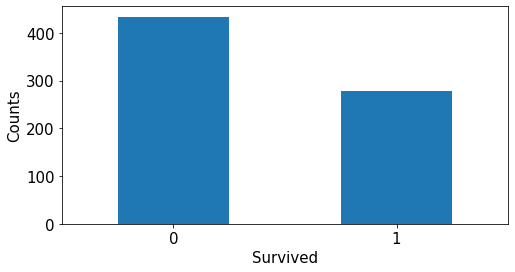

In [53]:
# Y Label 的分布情况

ax = dftrain_raw['Survived'].value_counts().plot(kind='bar', figsize=(8,4), fontsize=15, rot=0)
ax.set_ylabel('Counts', fontsize = 15)
ax.set_xlabel('Survived', fontsize = 15)
plt.show()

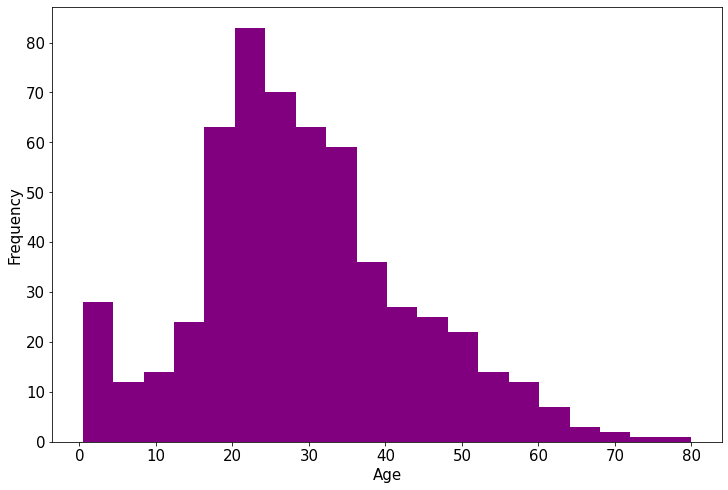

In [54]:
# 年龄的分布情况

ax = dftrain_raw['Age'].plot(kind='hist', bins=20, color='purple', figsize=(12,8), fontsize=15)

ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

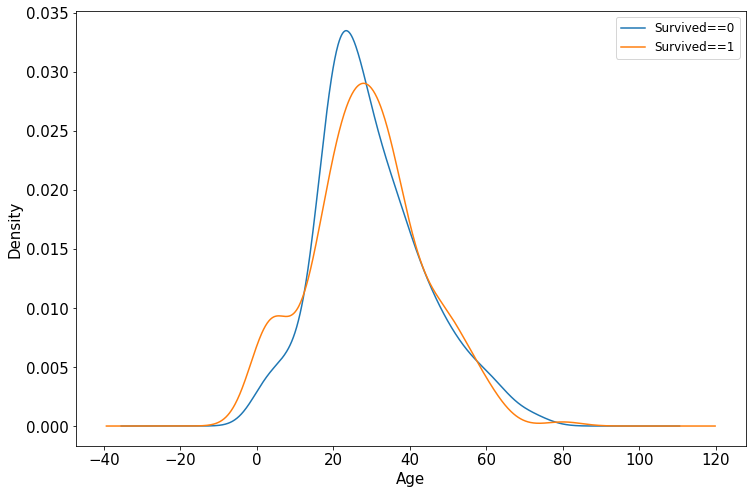

In [55]:
# 年龄和Label 的相关性

ax = dftrain_raw.query('Survived ==0')['Age'].plot(kind='density', figsize=(12,8), fontsize=15)
dftrain_raw.query('Survived==1')['Age'].plot(kind='density', figsize=(12,8), fontsize=15)
ax.legend(['Survived==0', 'Survived==1'], fontsize=12)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

In [58]:
# 正式数据的预处理

def preprocessing(dfdata):
    dfresult = pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pcalss_' + str(x) for x in dfPclass.columns]
    dfresult = pd.concat([dfresult, dfPclass], axis=1)

    #sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult, dfSex], axis=1)

    # Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    # Sibsp, Parch, Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] = pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult, dfEmbarked], axis=1)

    return dfresult

x_train = preprocessing(dftrain_raw).values
y_train = dftrain_raw[['Survived']].values

x_test = preprocessing(dftest_raw).values
y_test = dftest_raw[['Survived']].values

print('x_train.shape - ', x_train.shape)
print('x_test.shape -', x_test.shape)

print('y_train.shape -', y_train.shape)
print('y_test.shape -', y_test.shape)

x_train.shape -  (712, 15)
x_test.shape - (179, 15)
y_train.shape - (712, 1)
y_test.shape - (179, 1)


进一步使用DataLoader和TensorDataset封装成可以迭代的数据管道。



In [59]:
dl_train = DataLoader(dataset=TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).float()), shuffle=True, batch_size=8)
dl_valid = DataLoader(dataset=TensorDataset(torch.tensor(x_test).float(), torch.tensor(y_test).float()), shuffle=True, batch_size=8)

In [60]:
# 测试数据管道
for feature, label in dl_train:
    print(feature, label)
    break

tensor([[  1.0000,   0.0000,   0.0000,   1.0000,   0.0000,  31.0000,   0.0000,
           0.0000,   2.0000, 164.8667,   0.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000,   1.0000,  35.0000,   0.0000,
           0.0000,   0.0000,   7.8958,   1.0000,   1.0000,   0.0000,   0.0000,
           0.0000],
        [  1.0000,   0.0000,   0.0000,   1.0000,   0.0000,  50.0000,   0.0000,
           0.0000,   0.0000,  28.7125,   0.0000,   1.0000,   0.0000,   0.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   1.0000,   0.0000,  25.0000,   0.0000,
           1.0000,   0.0000,   7.9250,   1.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  0.0000,   1.0000,   0.0000,   1.0000,   0.0000,  28.0000,   0.0000,
           1.0000,   0.0000,  26.0000,   1.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000,   1.0000,  19.0000,   0.0000,
           0.0000,   0.0000,  1

定义模型
使用Pytorch通常有三种方式构建模型：使用nn.Sequential按层顺序构建模型，继承nn.Module基类构建自定义模型，继承nn.Module基类构建模型并辅助应用模型容器进行封装。

此处选择使用最简单的nn.Sequential，按层顺序模型。

In [61]:
def create_net():
    net = nn.Sequential()
    net.add_module('linear1', nn.Linear(15,20))
    net.add_module('relu1', nn.ReLU())
    net.add_module('linear2', nn.Linear(20,15))
    net.add_module('relu2', nn.ReLU())
    net.add_module('linear3', nn.Linear(15,1))
    net.add_module('sigmoid', nn.Sigmoid())
    return net

net = create_net()
print(net)


Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [62]:
from torchkeras import summary

summary(net, input_shape=(15,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             320
              ReLU-2                   [-1, 20]               0
            Linear-3                   [-1, 15]             315
              ReLU-4                   [-1, 15]               0
            Linear-5                    [-1, 1]              16
           Sigmoid-6                    [-1, 1]               0
Total params: 651
Trainable params: 651
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000057
Forward/backward pass size (MB): 0.000549
Params size (MB): 0.002483
Estimated Total Size (MB): 0.003090
----------------------------------------------------------------


训练模型
Pytorch通常需要用户编写自定义训练循环，训练循环的代码风格因人而异。

有3类典型的训练循环代码风格：脚本形式训练循环，函数形式训练循环，类形式训练循环。

In [63]:
from sklearn.metrics import accuracy_score

loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.01)
metric_func = lambda y_pred, y_true: accuracy_score(y_true.data.numpy(), y_pred.data.numpy()>0.5)
metric_name = 'accuracy'

In [65]:
epochs = 10
log_step_freq = 30

dfhistory = pd.DataFrame(columns=['epoch', 'loss', metric_name, 'val_loss', f'val_{metric_name}'])
print('Start Training...')

now = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('==========='*8 + f'{now}')

for epoch in range(1, epochs+1):
    # 1, 循环训练
    net.train()
    loss_sum = 0.0
    metric_sum = 0.0
    step = 1

    for step, (feature, label) in enumerate(dl_train, 1):
        # 梯度清零
        optimizer.zero_grad()

        # 正向传播求损失
        predictions = net(feature)
        loss = loss_func(predictions, label)
        metric = metric_func(predictions, label)

        # 反向传播求梯度
        loss.backward()
        optimizer.step()

        # 打印batch 级别的日志
        loss_sum += loss.item()
        metric_sum += metric.item()
        if step % log_step_freq == 0:
            print(('[step = %d] loss: %.3f, ' + metric_name + ':%.3f') % (step, loss_sum/step, metric_sum/step))

    # 2, 验证循环
    net.eval()
    val_loss_sum = 0.0
    val_metric_sum = 0.0
    val_step = 1

    for val_step, (features,labels) in enumerate(dl_valid, 1):
        # 关闭梯度计算
        with torch.no_grad():
            predictions = net(features)
            val_loss = loss_func(predictions,labels)
            val_metric = metric_func(predictions,labels)
        val_loss_sum += val_loss.item()
        val_metric_sum += val_metric.item()

    # 3，记录日志-------------------------------------------------
    info = (epoch, loss_sum/step, metric_sum/step, 
            val_loss_sum/val_step, val_metric_sum/val_step)
    dfhistory.loc[epoch-1] = info

    # 打印epoch级别日志
    print(("\nEPOCH = %d, loss = %.3f,"+ metric_name + \
            "  = %.3f, val_loss = %.3f, "+"val_"+ metric_name+" = %.3f") 
            %info)
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
    
print('Finished Training...')


Start Training...
========================================================================================2020-09-29 10:44:01
[step = 30] loss: 0.427, accuracy:0.792
[step = 60] loss: 0.431, accuracy:0.808

EPOCH = 1, loss = 0.434,accuracy  = 0.809, val_loss = 0.497, val_accuracy = 0.725

================================================================================2020-09-29 10:44:01
[step = 30] loss: 0.457, accuracy:0.800
[step = 60] loss: 0.454, accuracy:0.800

EPOCH = 2, loss = 0.447,accuracy  = 0.794, val_loss = 0.535, val_accuracy = 0.725

================================================================================2020-09-29 10:44:01
[step = 30] loss: 0.446, accuracy:0.779
[step = 60] loss: 0.428, accuracy:0.785

EPOCH = 3, loss = 0.433,accuracy  = 0.779, val_loss = 0.495, val_accuracy = 0.763

================================================================================2020-09-29 10:44:01
[step = 30] loss: 0.486, accuracy:0.779
[step = 60] loss: 0.455, accuracy:0.802

E

# 四 模型评估

In [66]:
dfhistory

,epoch,loss,accuracy,val_loss,val_accuracy
0,1.0,0.434349,0.808989,0.497281,0.724638
1,2.0,0.447030,0.793539,0.535287,0.724638
2,3.0,0.433498,0.779494,0.494770,0.762681
3,4.0,0.479920,0.794944,0.504602,0.719203
4,5.0,0.440731,0.789326,0.499897,0.733696
5,6.0,0.435638,0.808989,0.426626,0.820652
6,7.0,0.429576,0.792135,0.539498,0.788043
7,8.0,0.435298,0.803371,0.473442,0.711957
8,9.0,0.430253,0.797753,0.464347,0.744565
9,10.0,0.443640,0.789326,0.444135,0.771739


In [67]:
def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

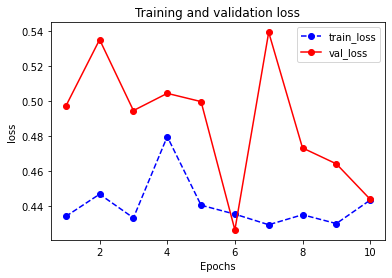

In [68]:
plot_metric(dfhistory, 'loss')

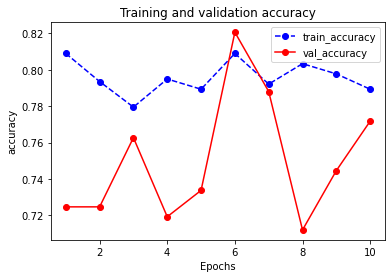

In [70]:
plot_metric(dfhistory, 'accuracy')

五 使用模型

In [71]:
# 预测概率
y_pred_probs = net(torch.tensor(x_test[0:10]).float()).data

y_pred_probs

tensor([[0.0829],
        [0.6765],
        [0.1894],
        [0.1638],
        [0.1086],
        [0.7640],
        [0.3529],
        [0.0798],
        [0.9941],
        [0.6249]])

In [72]:
# 预测类别
y_pred = torch.where(y_pred_probs>0.5, torch.ones_like(y_pred_probs), torch.zeros_like(y_pred_probs))
y_pred

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.]])

六，保存模型
Pytorch 有两种保存模型的方式，都是通过调用pickle序列化方法实现的。

第一种方法只保存模型参数。

第二种方法保存完整模型。

推荐使用第一种，第二种方法可能在切换设备和目录的时候出现各种问题。

In [73]:
# 1. 保存模型参数(推荐)
print(net.state_dict().keys())

odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])


In [75]:
# 保存模型参数

torch.save(net.state_dict(), './data/net_parameter.pkl')

net_clone = create_net()
net_clone.load_state_dict(torch.load('./data/net_parameter.pkl'))

net_clone.forward(torch.tensor(x_test[0:10]).float()).data

tensor([[0.0829],
        [0.6765],
        [0.1894],
        [0.1638],
        [0.1086],
        [0.7640],
        [0.3529],
        [0.0798],
        [0.9941],
        [0.6249]])

2，保存完整模型(不推荐)



In [76]:
torch.save(net, './data/net_model.pkl')
net_loaded = torch.load('./data/net_model.pkl')
net_loaded(torch.tensor(x_test[0:10]).float()).data

tensor([[0.0829],
        [0.6765],
        [0.1894],
        [0.1638],
        [0.1086],
        [0.7640],
        [0.3529],
        [0.0798],
        [0.9941],
        [0.6249]])